In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [2]:
mangaid = '1-284293'
nsa_z = 0.129080
plateifu = '8318-6102'

In [3]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8318-6102-LOGCUBE.fits.gz')

flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

do_not_use = (mask & 2**10) != 0 

wave = data['WAVE'].data

flux_header = data['FLUX'].header

In [4]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [5]:
a = 5007 * (1 + nsa_z)

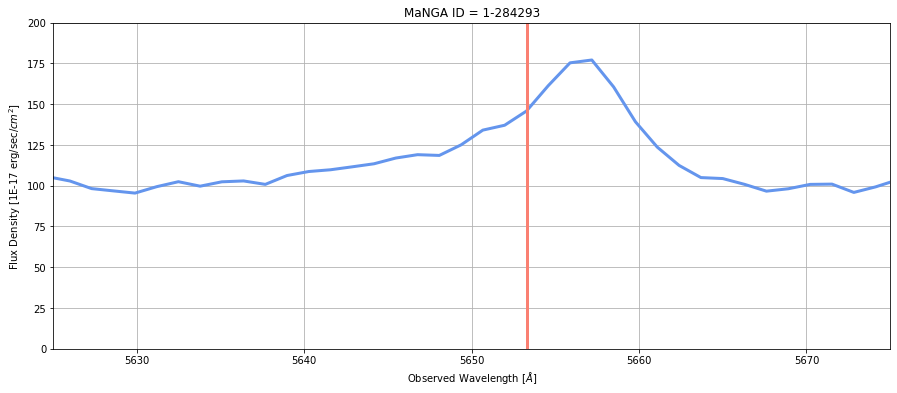

In [6]:
start = 5625
end = 5675
height = 200
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

## Lower Bound -- Lower MBH

In [68]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
# yaxis = yaxis[9:32]
yaxis_lower = yaxis[11:30]
print(yaxis_lower)
print(len(yaxis_lower))

# for i in yaxis:
#     print(wave[i])

[1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937
 1938 1939 1940 1941 1942]
19


In [69]:
flux_compare = [] 
ivar_compare = []

for i in yaxis_lower:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(2916, 19)

In [70]:
result = []
sumresult = []

for i in range(len(yaxis_lower)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

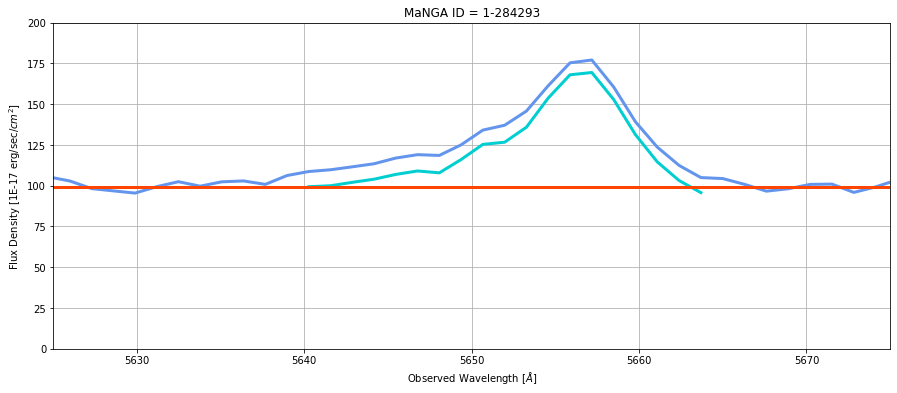

In [71]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0, height)
# plt.ylim(100,125)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [78]:
line1 = 5662
line2 = 5664
height1 = 95
height2 = 110

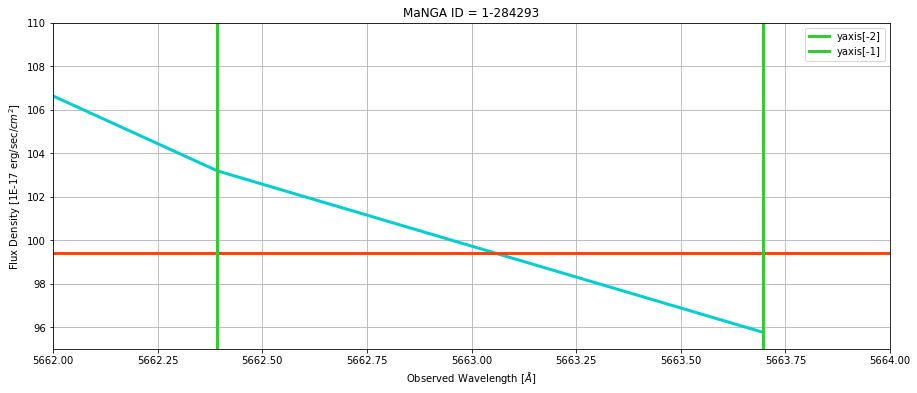

In [79]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [80]:
index2 = np.where(yaxis_lower == yaxis_lower[-2])[0][0]
print(index2)
sumresult[index2]

17


103.18236035853624

In [81]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis_lower[-2]], wave[yaxis_lower[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5662.3928903825345, 5663.696854647211]
[103.18236035853624, 95.75546363182366]
103.18236035853624


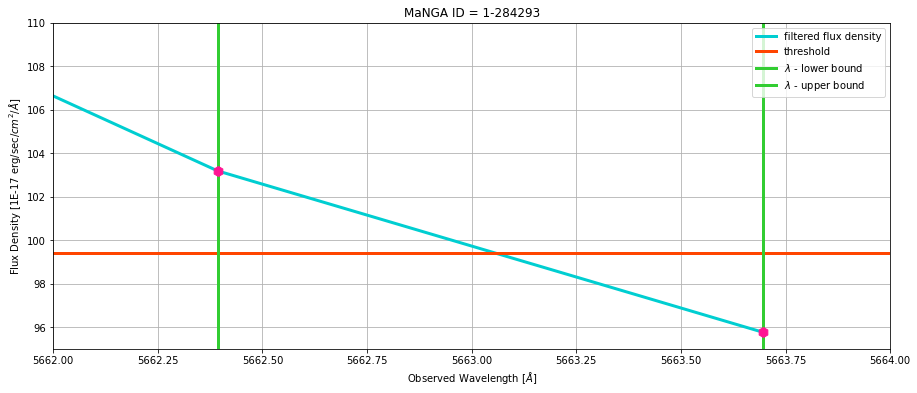

In [82]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [83]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-5.695629035168477

In [84]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

32354.071715352857

In [85]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [86]:
xval = func(sumresult[index], m, c)
xval

99.38523367606103 -5.695629035168477 32354.071715352857


5663.059564187838

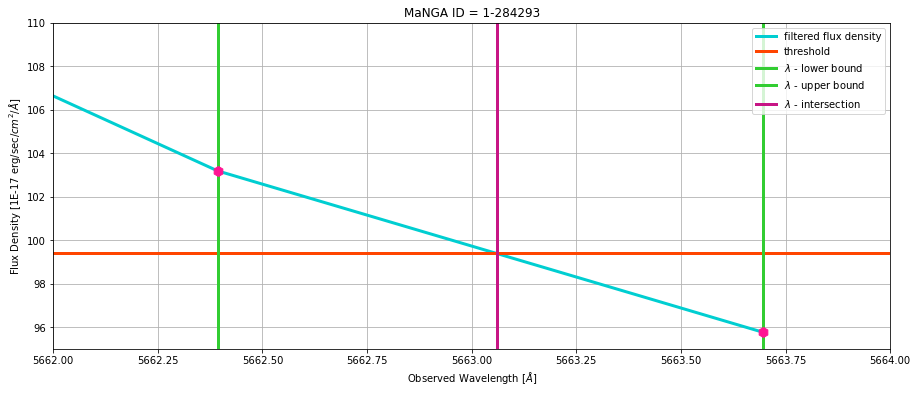

In [87]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [88]:
xcoord = []
ycoord = []

for i in range(yaxis_lower[0], yaxis_lower[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(19, 19, 19)

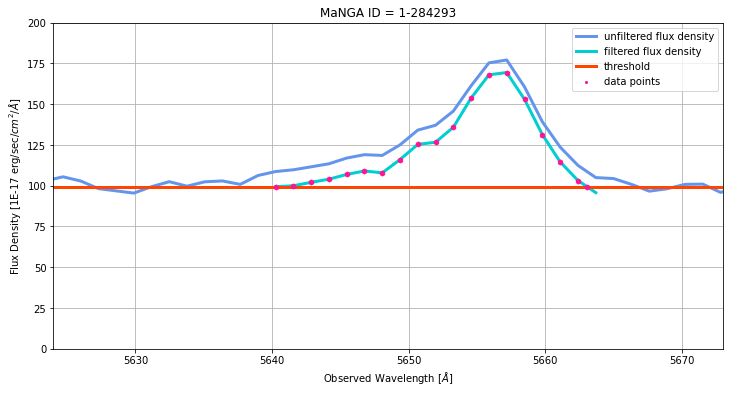

In [89]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start-1, end-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord)):
    plt.plot(xcoord[i], ycoord[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [90]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [91]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

2833.3503847962083

In [92]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

2264.809575174369

In [93]:
fluxarea = finalarea - subtract
fluxarea

568.5408096218393

In [94]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.12908

In [95]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

## Upper Bound -- Higher MBH

In [96]:
start_upper = 5625
end_upper = 5680

In [97]:
# select peak region
# index = 0
yaxis = np.where(np.logical_and(wave > start_upper, wave < end_upper))[0]
# print(yaxis)
    
# yaxis = yaxis[9:32]
yaxis_upper = yaxis[3:37]
print(yaxis_upper)
print(len(yaxis_upper))

# for i in yaxis:
#     print(wave[i])

[1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949]
34


In [98]:
flux_compare_upper = [] 
ivar_compare_upper = []

for i in yaxis_upper:
    flux_compare_upper.append(flux[:,:,i].flatten())
    ivar_compare_upper.append(ivar[:,:,i].flatten())

flux_compare_upper = np.array(flux_compare_upper)
ivar_compare_upper = np.array(ivar_compare_upper)

len(flux_compare_upper[0]), len(ivar_compare_upper)

(2916, 34)

In [99]:
result_upper = []
sumresult_upper = []

for i in range(len(yaxis_upper)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_upper[i][j]) if ivar_compare_upper[i][j] != 0 else 0
        
        if flux_compare_upper[i][j] < (3 * sigma):
            result_upper.append(0)
        else:
            result_upper.append(flux_compare_upper[i][j])
    sumresult_upper.append(np.sum(result_upper))
    result_upper = []

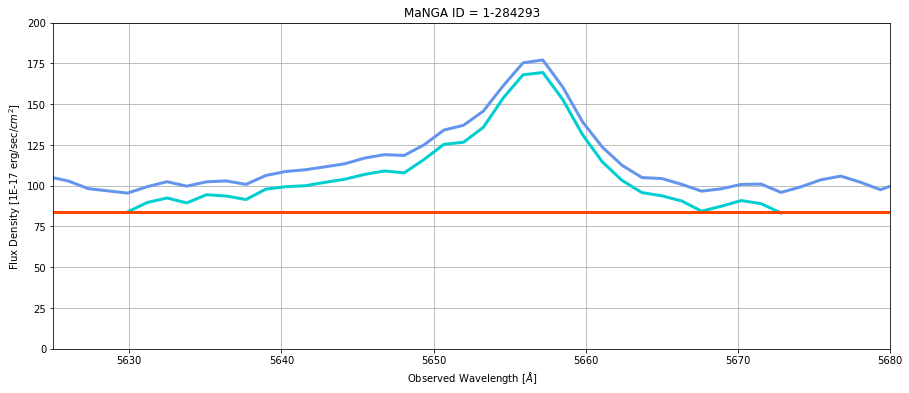

In [100]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start_upper, end_upper)
# plt.xlim(5590, 5595)
plt.ylim(0, height)
# plt.ylim(75, 90)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [101]:
line1_upper = 5671.25
line2_upper = 5673
height1_upper = 82
height2_upper = 90

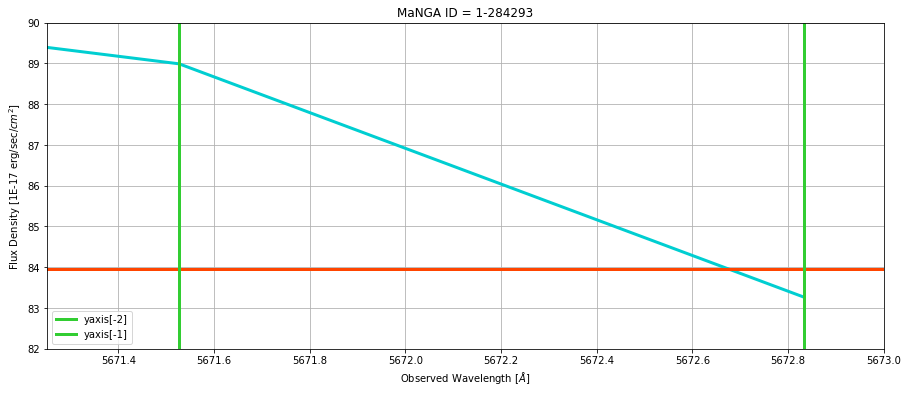

In [102]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [103]:
index2_upper = np.where(yaxis_upper == yaxis_upper[-2])[0][0]
print(index2_upper)
sumresult_upper[index2_upper]

32


88.98982289619744

In [104]:
# Get x and y of the both coordinates that define the line above 
x_upper = [wave[yaxis_upper[-2]], wave[yaxis_upper[-1]]]
y_upper = [sumresult_upper[index2_upper], sumresult_upper[index2_upper + 1]]
print(x_upper)
print(y_upper)
print(sumresult_upper[index2_upper])

[5671.526948608318, 5672.833016309789]
[88.98982289619744, 83.26863664761186]
88.98982289619744


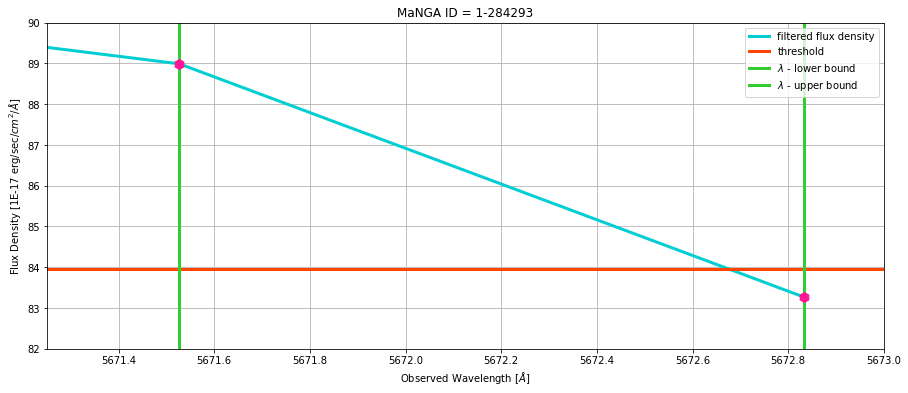

In [105]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [106]:
# Get the gradient of the line above 
m_upper = (y_upper[1] - y_upper[0])/(x_upper[1] - x_upper[0])
m_upper

-4.380466833489617

In [107]:
# Get the y intercept of the line above 
c_upper = y_upper[0] - m_upper*x_upper[0]
c_upper

24932.925516517505

In [108]:
xval_upper = func(sumresult_upper[index], m_upper, c_upper)
xval_upper

83.951645642519 -4.380466833489617 24932.925516517505


5672.677094801678

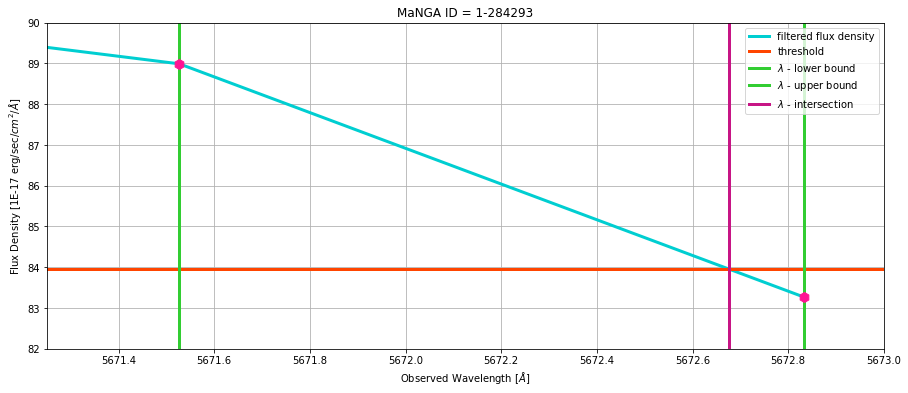

In [109]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval_upper, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [110]:
xcoord_upper = []
ycoord_upper = []

for i in range(yaxis_upper[0], yaxis_upper[-1]):
    xcoord_upper.append(wave[i])
    
xcoord_upper.append(xval_upper)
ycoord_upper = sumresult_upper[:-1]
ycoord_upper.append(sumresult_upper[index])
len(xcoord_upper), len(sumresult_upper), len(ycoord_upper)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(34, 34, 34)

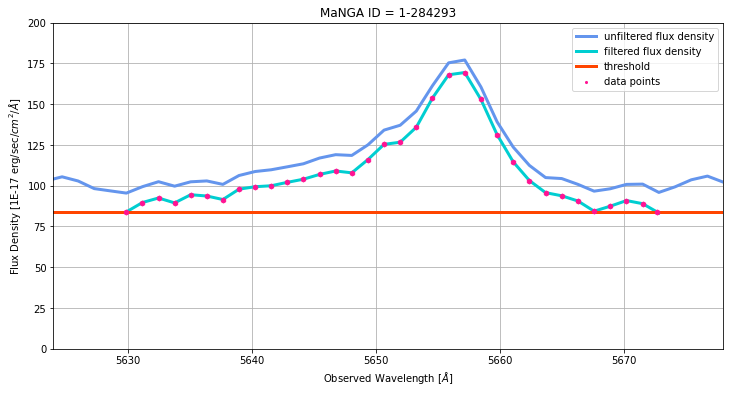

In [111]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start_upper-1, end_upper-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult_upper[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord_upper)):
    plt.plot(xcoord_upper[i], ycoord_upper[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [112]:
dlmd_upper = []
for i in range(len(xcoord_upper)-1):
    dlmd_upper.append(xcoord_upper[i+1] - xcoord_upper[i])

In [113]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area_upper = ycoord_upper[0] * dlmd_upper[0] + ycoord_upper[-1] * dlmd_upper[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord_upper)-1):
#     print(i)
    area_upper += ycoord_upper[i] * (dlmd_upper[i-1] + dlmd_upper[i])

finalarea_upper = (1/2) * area_upper
finalarea_upper

4660.4764135706655

In [114]:
subtract_upper = ycoord_upper[0] * (xcoord_upper[-1] - xcoord_upper[0])
subtract_upper

3591.948466464001

In [115]:
fluxarea_upper = finalarea_upper - subtract_upper
fluxarea_upper

1068.5279471066647

In [116]:
luminosity_distance = Mpc_to_cm(605.6)
luminosity_upper = luminosity_calc(luminosity_distance, fluxarea_upper)
print(luminosity_distance, 'cm', '/', luminosity_upper, ('erg/s (?)'))

1.868687808e+27 cm / 4.688881463422421e+41 erg/s (?)


In [117]:
print('UPPER BOUND')
print('flux', fluxarea_upper)
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

UPPER BOUND
flux 1068.5279471066647
M_BH / M_sol = 11894223.871294651
log(luminosity) = 41.67106925375991
log(M_BH / M_sol) = 7.075336108465674
log(luminosity / sol_lum) = 8.086059973857447


In [118]:
luminosity_distance = Mpc_to_cm(605.6)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.868687808e+27 cm / 2.494853289194228e+41 erg/s (?)


In [119]:
print('LOWER BOUND')
print('flux', fluxarea)
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

LOWER BOUND
flux 568.5408096218393
M_BH / M_sol = 6328661.489781535
log(luminosity) = 41.3970450118565
log(M_BH / M_sol) = 6.801311866562266
log(luminosity / sol_lum) = 7.8120357319540386


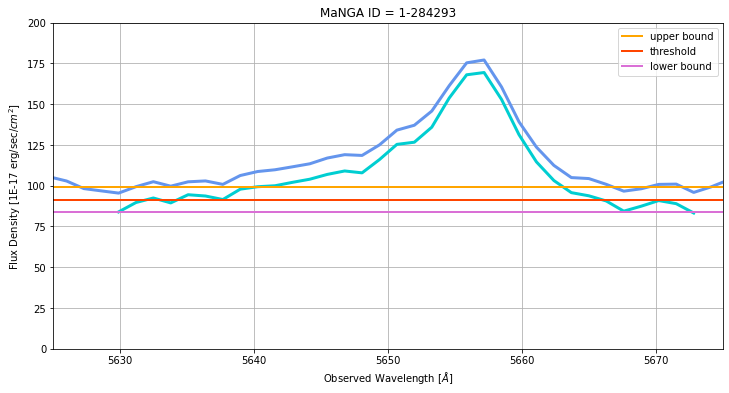

In [120]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start, end)
# plt.xlim(5500,5700)
plt.ylim(0, height)
# plt.ylim(200,300)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 2, color = 'orange', label = 'upper bound')

plt.axhline(91.5370797496289, linewidth = 2, color = 'orangered', label = 'threshold')
# plt.axhline(106.03559160605073, linewidth = 2, color = 'orangered', label = 'threshold')

plt.axhline(sumresult_upper[index], linewidth = 2, color = 'orchid', label = 'lower bound')


plt.legend()

# plt.savefig('Images/ub_th_lb.png', bbox_inches = 'tight')